# Graph III

In [1]:
1+1

2

In [2]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [4]:
def first_node(state:AgentState) -> AgentState:
    """This is the first node of our sequence"""

    state["final"] = f"Hi {state["name"]}!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This is the second node of our sequence"""

    state["final"] = state["final"] + f" You are {state["age"]} years old!"

    return state

In [5]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()

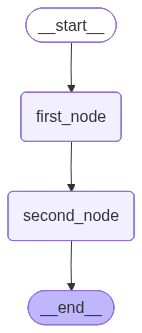

In [6]:
app

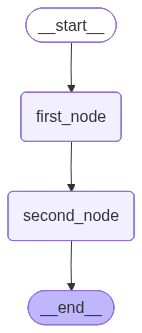

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({"name": "Charlie", "age": 20})
print(result)

{'name': 'Charlie', 'age': 20, 'final': 'Hi Charlie! You are 20 years old!'}


In [9]:
print(result['final'])

Hi Charlie! You are 20 years old!
